In [5]:
import os
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
import arcadia_pycolor as apc
apc.mpl_setup()


In [6]:
#get date for appending to filenames 
today = datetime.today().strftime('%Y%m%d') 

#specify input and output paths
human_data_path ="../inputs/stripy_AR_counts.csv"
species_data_path ="../results/analyzed_AAcounts/AR/pathologic_AA_repeats.csv"
plots_folder_path = "../results/plots"

# read in human population AR repeat data
AR_humandist = pd.read_csv(human_data_path )
AR_humandist["Percentage"] = AR_humandist["Percentage"].str.rstrip('%').astype('float')

# read in species homologs AR repeat data
AR_speciesdist = pd.read_csv(species_data_path)


/var/folders/ht/b6n56hsx26sdcq4rxc_rxqp40000gn/T/ipykernel_51111/1487428462.py:25: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  g.set_ylim([0,1000])


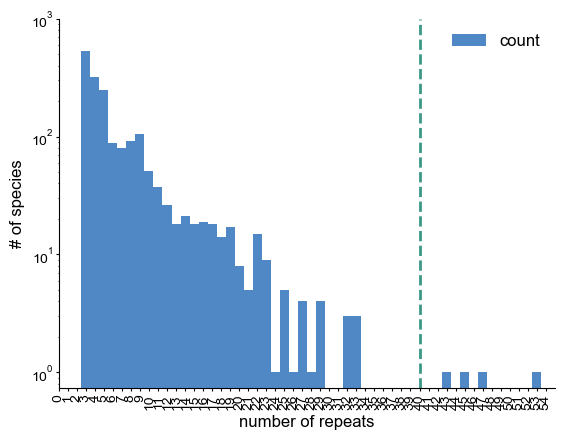

In [7]:
#plot species data

#get number of homologs with each repeat length
species_counts = AR_speciesdist.value_counts(subset="Length",sort = False)

#fill in 0 if there are no homologs for some repeat lengths
x_range = range(0, species_counts.max() + 1)
merged_data = pd.merge(
    pd.DataFrame({'Length': x_range}),
    species_counts,
    on='Length', 
    how='left'
    ).fillna(0)

#plot

g = merged_data.plot.bar(x='Length',y='count',
                         xlabel= "number of repeats", ylabel="# of species",
                         color = "arcadia:aegean",width=1
                         )

xticks = range(0, 55)
plt.xticks(xticks,xticks,rotation='vertical')
g.set_yscale('log')
g.set_ylim([0,1000])
g.set_xlim([0,55])
plt.axvline(x =40, color = "arcadia:Seaweed" , linestyle = "dashed", label = 'healthy human limit')
plt.savefig(os.path.join(plots_folder_path,'species_distribution_repeat_lengths'+today+'.svg'), format='svg', dpi=1200)




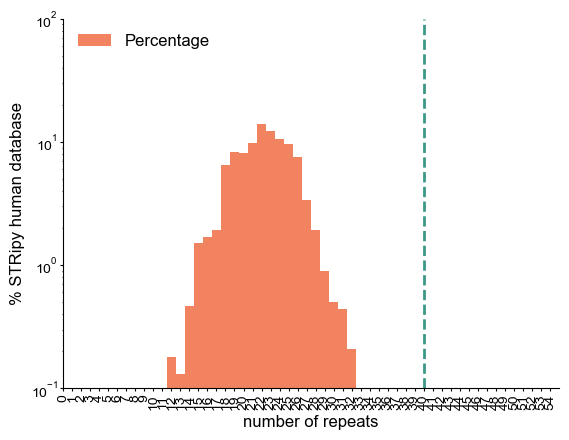

In [8]:
#plot human data

#fill in 0 if there are no people with some repeat lengths
x_range = range(0, AR_humandist['Number of repeats'].max() + 1)
merged_data = pd.merge(
    pd.DataFrame({'Number of repeats': x_range}),
    AR_humandist,
    on='Number of repeats', 
    how='left'
    ).fillna(0)

#plot
g = merged_data[["Number of repeats","Percentage"]].plot.bar(
    x='Number of repeats',y='Percentage',
    xlabel = 'number of repeats',ylabel="% STRipy human database",
    color = "arcadia:amber",width=1)

xticks = range(0, 55)
plt.xticks(xticks,xticks,rotation='vertical')
g.set_yscale('log')
g.set_ylim([0.1,100])
g.set_xlim([0,55])

plt.axvline(x =40, color = "arcadia:Seaweed" , linestyle = "dashed", label = 'healthy human limit')

plt.savefig(os.path.join(plots_folder_path,'human_distribution_repeat_lengths'+today+'.svg'), format='svg', dpi=1200)
